<a href="https://colab.research.google.com/github/Alexander-Resch/08_Dynamic-Mechanical-Analysis/blob/master/Triangles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt

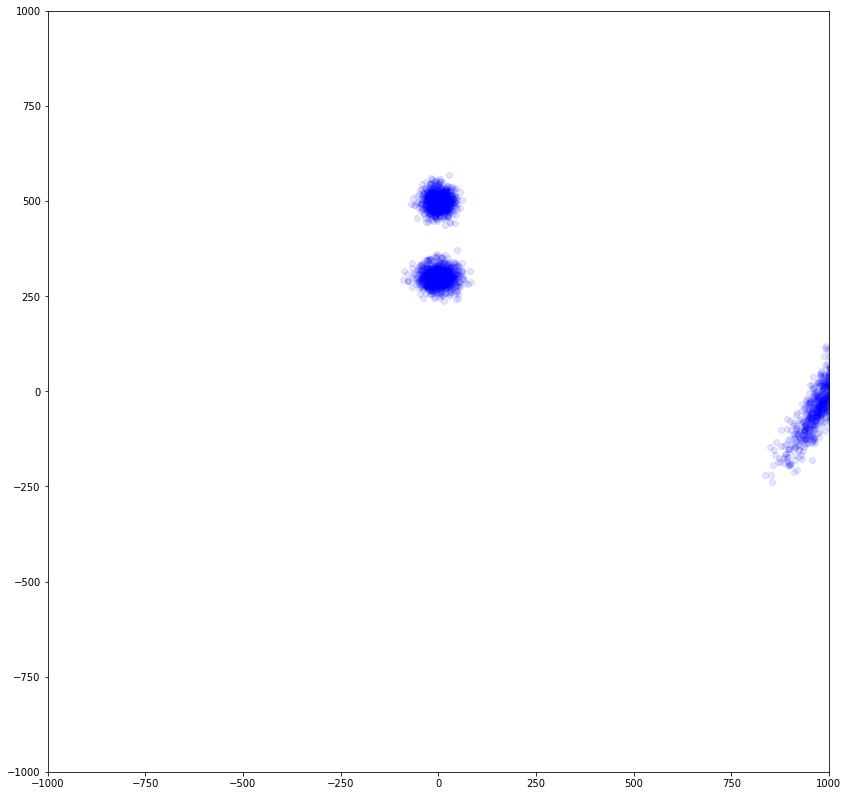

In [93]:
def add_Noise(X=[0,0],sigma=1,mu=0,sigma_alpha=0):

  X[0] = X[0]+sigma*np.random.randn()+mu
  X[1] = X[1]+sigma*np.random.randn()+mu
  rotation = sigma_alpha*np.random.randn()

  return X, rotation

def rotate_Points(Coordinates,angle_in_degrees,center_of_rotation=(0,0)):


  rotation = angle_in_degrees*np.pi/180 #convert to radian
  M = np.array([[np.cos(rotation),-np.sin(rotation)],
                [np.sin(rotation),np.cos(rotation)]])
  
  Rotated_Coordinates = []
  
  for point in Coordinates:
    point=list(point)
    #print('initial point: ', point)
    
    point[0] = point[0]-center_of_rotation[0]
    point[1] = point[1]-center_of_rotation[1]
    #print('shifted point: ', point)

    p = np.array([[point[0]],
                  [point[1]]])
    #print(M.shape,p.shape)
    p_new = np.ravel(M.dot(p))
    #print('rotated point: ', p_new)

    p_new[0] = p_new[0]+center_of_rotation[0]
    p_new[1] = p_new[1]+center_of_rotation[1]
    #print('shifted bacl point: ', p_new)

    Rotated_Coordinates.append((p_new[0],p_new[1]))
  
  return Rotated_Coordinates

f = plt.figure(figsize=(14,14))
ax = f.add_subplot()
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)

for i in range(1000):

  'DEFINE COORDINATES [mm]'
  tx, ty = 0, 500
  T = [tx, ty]
  T, angle_in_degrees = add_Noise(T,sigma=20,sigma_alpha=5)
  
  dxBT, dyBT = -0, -200  
  bx, by = 0, 0
  B = [bx, by]
  B[0], B[1] = T[0]+dxBT,T[1]+dyBT#-500 
  
  dxWT, dyWT = 1000, -500  
  wx, wy = 1000, 0
  W = [wx,wy]
  W[0], W[1] = T[0]+dxWT,T[1]+dyWT

  tri = [T,B,W]
  rotated_triangle = rotate_Points(tri,angle_in_degrees=angle_in_degrees,center_of_rotation=T)

#plot simulated


  for p in rotated_triangle:
    ax.scatter(p[0],p[1],alpha = 0.1, color = 'blue')


In [ ]:

q = []
for i in range(1000):
  T = [0,500] #initial position
  T,_ = add_Noise(T)
  q.append(make_triangle(T))

x = [x[0] for x in q]
y = [x[1] for x in q]
f = plt.figure(figsize = (14,12))

ax = f.add_subplot()
ax.set_ylim([-10,600])
ax.set_xlim([-100,1100])
ax.scatter(x,y)

NameError: ignored

In [ ]:
A = np.array([1,1])
B = np.array([2,3])
A+B

array([3, 4])

In [ ]:

'''
def make_triangle(T=[0,500], rotation = 0,B=[0,0],W=[1000,0]):
  dWB = 1000
  dTB = 500
  dTW = np.sqrt((500**2)+(1000**2))
  T_old = np.array([0,500])
  
  # T is passed as a noisy point
  T = np.array(T)
  
  #calculate new B and W values based on noisy T with rotation Matrix
  rotation = rotation*np.pi/180 #convert to radian
  M = np.array([[np.cos(rotation),-np.sin(rotation)],[np.sin(rotation),np.cos(rotation)]])
  #print(M)
  
  B = np.array(B) + dTB

  W = np.array(W)
  

  Position_T = T 
  

  return Position_T

make_triangle(rotation=45)
'''

def rotatePoint(centerPoint,point,angle):
  import math 
  """Rotates a point around another centerPoint. Angle is in degrees.
  Rotation is counter-clockwise"""
  angle = math.radians(angle)
  temp_point = point[0]-centerPoint[0] , point[1]-centerPoint[1]
  temp_point = ( temp_point[0]*math.cos(angle)-temp_point[1]*math.sin(angle) , temp_point[0]*math.sin(angle)+temp_point[1]*math.cos(angle))
  temp_point = temp_point[0]+centerPoint[0] , temp_point[1]+centerPoint[1]
  return temp_point